In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
import IPython.display as display
from PIL import Image
import matplotlib.pyplot as plt
import pathlib
import numpy as np

In [2]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [52]:
test_dir = "../catdogdata/dataset/"
test_dir = pathlib.Path(test_dir)

In [53]:
image_count = len(list(test_dir.glob('*/*.jpg')))
image_count

2000

In [54]:
train_dir = "../catdogdata/dataset/train"
train_dir = pathlib.Path(train_dir)

In [58]:
valid_dir = "../catdogdata/dataset/validation/"
valid_dir = pathlib.Path(valid_dir)

In [59]:
image_count = len(list(train_dir.glob('*/*.jpg')))
valid_count = len(list(valid_dir.glob('*/*.jpg')))
image_count, valid_count

(6000, 2000)

In [60]:
CLASS_NAMES = np.array([item.name for item in train_dir.glob('*') if item.name != "LICENSE.txt"])
CLASS_NAMES

array(['cats', 'dogs'], dtype='<U4')

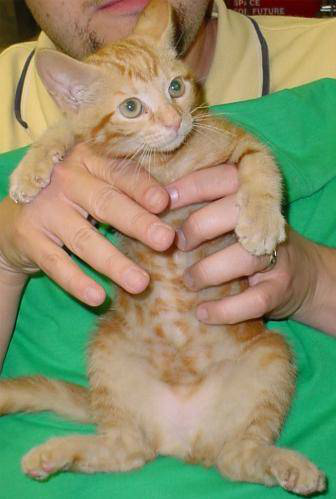

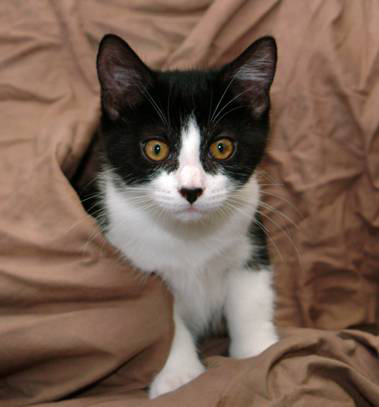

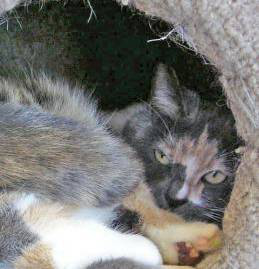

In [61]:
train = list(train_dir.glob('cats/*'))

for image_path in train[:3]:
    display.display(Image.open(str(image_path)))

In [25]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [26]:
BATCH_SIZE = 32
IMG_HEIGHT = 75
IMG_WIDTH = 75
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import time

In [28]:
IMG_SIZE = 75 # Replace with the size of your images
NB_CHANNELS = 3 # 3 for RGB images or 1 for grayscale images
BATCH_SIZE = BATCH_SIZE # Typical values are 8, 16 or 32
NB_TRAIN_IMG = 6000 # Replace with the total number training images
NB_VALID_IMG = 2000 # Replace with the total number validation images

In [29]:
model = Sequential()
model.add(Conv2D(filters=32, 
               kernel_size=(2,2), 
               strides=(1,1),
               padding='same',
               input_shape=(IMG_SIZE,IMG_SIZE,NB_CHANNELS),
               data_format='channels_last'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),
                     strides=2))
model.add(Conv2D(filters=64,
               kernel_size=(2,2),
               strides=(1,1),
               padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),
                     strides=2))
model.add(Flatten())        
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [62]:
img_datagen = ImageDataGenerator(
    rotation_range = 40,                  
    width_shift_range = 0.2,                  
    height_shift_range = 0.2,                  
    rescale = 1./255,                  
    shear_range = 0.2,                  
    zoom_range = 0.2,                     
    horizontal_flip = True)

train_generator = img_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE,IMG_SIZE),
    class_mode='binary',
    batch_size = BATCH_SIZE)

valid_generator = img_datagen.flow_from_directory(
    valid_dir,
    target_size=(IMG_SIZE,IMG_SIZE),
    class_mode='binary',
    batch_size = BATCH_SIZE)

Found 6000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [63]:
print("Training...")
start = time.time()
model.fit_generator(
    train_generator,
    validation_data=valid_generator,
    steps_per_epoch=NB_TRAIN_IMG//BATCH_SIZE,
    epochs=5)
end = time.time()
print('Processing time:',(end - start)/60)

Training...
Epoch 1/5
250/250 [==============================] - 58s 234ms/step - loss: 0.5623 - accuracy: 0.7082 - val_loss: 0.5532 - val_accuracy: 0.7135
Epoch 2/5
250/250 [==============================] - 57s 229ms/step - loss: 0.5633 - accuracy: 0.7048 - val_loss: 0.5700 - val_accuracy: 0.7075
Epoch 3/5
250/250 [==============================] - 57s 228ms/step - loss: 0.5539 - accuracy: 0.7154 - val_loss: 0.5407 - val_accuracy: 0.7270
Epoch 4/5
250/250 [==============================] - 58s 230ms/step - loss: 0.5491 - accuracy: 0.7147 - val_loss: 0.5182 - val_accuracy: 0.7480
Epoch 5/5
250/250 [==============================] - 56s 226ms/step - loss: 0.5476 - accuracy: 0.7221 - val_loss: 0.5070 - val_accuracy: 0.7565
Processing time: 4.777316403388977


In [37]:
model.save_weights('./output/model_baseline.h5')